### Python code to data preprocessing and visualization

This notebook the data preprocessing and vaisulaization

The route sections (All, North, Middle, South, direct) can be selected by modifying the value of the following flag switch (nth_mid_sth_fg) 

The inputs combination (0, 1, 2, 3) can be selected by modifying the value of the following flag switch (inp_idx) 


This notebook is reproducible,  the user just needs to chang the user_name in first cell, then the rest will automatically be created, such as folders and subfolders where figure and excel files are saved.


In [1]:
user_name='mohabu'

In [2]:
nth_mid_sth_fg=0 ## All sections
# nth_mid_sth_fg=1 ##North section
# nth_mid_sth_fg=2 ##Middle section
# nth_mid_sth_fg=3 ##South section
# nth_mid_sth_fg=4 ##Direct routes

In [3]:
# local_Eff_fg=1  ## use local data, where the eff-score calculated every timestep, 1min rather than the total route
local_Eff_fg=0

In [4]:
# gr_ock_fg=1  ## select Groto to Ockero routes only
# gr_ock_fg=0  ## select Ockero to Groto routes only
gr_ock_fg=2  ## ALl data together

In [5]:
top_test_fg=1 ## Reserve some routes with top eff-score for test data
###top_test_fg=0
###################

wd_sz=27

Eff_limit_fg=[1] 
# Eff_limit_fg=['Q50'] 
# Eff_limit_fg=['Q75'] 

In [6]:
####Data Partition
train_pt=0.70  ## partition data between training and test
test_pt=0.81   ## partition data between valid and test

In [7]:
tempo_res='1min'; 

###########
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
Output_folder='Spatio_Temporl_Agg_Eff_Score'


Output_Subfolder = Output_folder+'/Preprocess_data_v1'+'/GrOck_'+str(gr_ock_fg)+'_loc_'+str(local_Eff_fg)+'_nthmidsth_'+str(nth_mid_sth_fg)

In [9]:
folder_path = r'C:/Users/'+user_name+'/'+Output_Subfolder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [10]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.models import Arrow, VeeHead, Label, NormalHead, OpenHead
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [11]:
'C:/Users/'+user_name+'/'+Output_folder+'/Agg_Eff_Data/All_Data_v3_includ_directRTs.xlsx'

'C:/Users/mohabu/Spatio_Temporl_Agg_Eff_Score/Agg_Eff_Data/All_Data_v3_includ_directRTs.xlsx'

In [12]:
if local_Eff_fg==0:
    df=pd.read_excel('C:/Users/'+user_name+'/'+Output_folder+'/Agg_Eff_Data/All_directDatav3_incld_NewEff_F1_date_loc_0.xlsx')
if local_Eff_fg==1:
    df=pd.read_excel('C:/Users/'+user_name+'/'+Output_folder+'/Agg_Eff_Data/All_directDatav3_incld_NewEff_F1_date_loc_1.xlsx')
df.shape

(39193, 72)

In [13]:
df.columns

Index(['Unnamed: 0', 'RT_id', 'time_xPorts', 'eff_score', 'latitude',
       'longitude', 'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       

In [14]:
if gr_ock_fg==1:
    df=df[df.Gr_Ock_fg==1]
if gr_ock_fg==0:
    df=df[df.Gr_Ock_fg==0]
if gr_ock_fg==2:
    df=df
    
print(df.shape)
print(df.Gr_Ock_fg.unique())

(39193, 72)
[0 1]


In [15]:
df[(df.Direct_RT==1)].shape

(918, 72)

In [16]:
if nth_mid_sth_fg==0:
    df=df
if nth_mid_sth_fg==1:
    df_north=df[(df.latitude>57.71) & (df.longitude<11.679)]
    north_idx=df_north.index
    print(df_north.shape)
    df=df_north

if nth_mid_sth_fg==2:
    df_mid=df[(df.latitude>57.705) & (df.longitude>11.679) & (df.longitude<11.69)]
    mid_idx=df_mid.index
    print(df_mid.shape)
    df=df_mid
    
if nth_mid_sth_fg==3:
    df_south=df[(df.latitude<57.705) & (df.longitude>11.686)]
    south_idx=df_south.index
    print(df_south.shape)
    df=df_south
    
if nth_mid_sth_fg==4:
    df_direct=df[(df.Direct_RT==1)]
    direct_idx=df_south.index
    print(df_direct.shape)
    df=df_direct
    
if nth_mid_sth_fg==13:
    df_NS=df[((df.latitude>57.71) & (df.longitude<11.679))| ((df.latitude<57.705) & (df.longitude>11.686)) ]
    NS_idx=df_NS.index
    print(df_NS.shape)
    df=df_NS
    
if nth_mid_sth_fg==134:
    df_NS_direct=df[(df.Direct_RT==1) | ((df.latitude>57.71) & (df.longitude<11.679)) 
                    | ((df.latitude<57.705) & (df.longitude>11.686))]
    NS_direct_idx=df_NS_direct.index
    print(df_NS_direct.shape)
    df=df_NS_direct

In [17]:
df

,Unnamed: 0,RT_id,time_xPorts,eff_score,latitude,longitude,accelPedalPos,headingMagnetic,courseOverGroundTrue,speedOverGround,...,windDirection_cds,wind_head_diff,date,local_eff_score,Gr_Ock_fg,Direct_RT,accel_data,F1_score,Eff_new,eff_score_old
0,0,248,1,0.410889,57.711047,11.659483,29.336750,239.203157,63.764782,1.738404,...,228.614059,239.203157,2020-01-16 13:10:00,0.680602,0,0,0.000000,0.589111,0.410889,0.702661
1,1,248,2,0.410889,57.711401,11.660977,61.683917,130.172187,82.782518,2.088625,...,228.516052,130.172187,2020-01-16 13:11:00,0.129180,0,0,0.350221,0.589111,0.410889,0.702661
2,2,248,3,0.410889,57.712142,11.664302,64.696250,66.558752,63.644947,4.688200,...,228.418045,66.558752,2020-01-16 13:12:00,0.403199,0,0,2.599575,0.589111,0.410889,0.702661
3,3,248,4,0.410889,57.713221,11.668567,64.650250,70.919434,66.850144,4.658400,...,228.320023,70.919434,2020-01-16 13:13:00,0.400802,0,0,-0.029800,0.589111,0.410889,0.702661
4,4,248,5,0.410889,57.714124,11.672979,64.538967,74.650272,71.377441,4.734000,...,228.222015,74.650272,2020-01-16 13:14:00,0.421207,0,0,0.075600,0.589111,0.410889,0.702661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39188,39188,1718,9,0.658637,57.709019,11.669584,7.017333,300.937273,307.756888,2.871100,...,236.504684,300.937273,2021-03-12 14:47:00,0.960009,1,1,-1.138175,0.341363,0.658637,0.982430
39189,39189,1718,10,0.658637,57.709871,11.667433,13.292333,301.063825,306.291964,2.595100,...,236.511200,301.063825,2021-03-12 14:48:00,0.863159,1,1,-0.276000,0.341363,0.658637,0.982430
39190,39190,1718,11,0.658637,57.710742,11.664951,27.517333,291.028698,296.673364,3.269400,...,236.517715,291.028698,2021-03-12 14:49:00,0.879491,1,1,0.674300,0.341363,0.658637,0.982430
39191,39191,1718,12,0.658637,57.711195,11.661794,13.499000,265.824628,271.824943,3.067575,...,236.524231,265.824628,2021-03-12 14:50:00,1.000000,1,1,-0.201825,0.341363,0.658637,0.982430


In [18]:
# st=stop

### Postprocessing the saved data

In [19]:
if df.courseOverGroundTrue.max()>360:
    df.courseOverGroundTrue=df.courseOverGroundTrue/180*np.pi
    print(df.courseOverGroundTrue.max())

In [20]:
if (df.headingMagnetic.max()>6) & (df.windDirectionTrue.max()<180):
    df['windDirectionTrue']=df.windDirectionTrue*180/np.pi
    wind_head_diff=df.windDirectionTrue-df.headingMagnetic
    print(wind_head_diff.max())

In [21]:
df[['windSpeed_onboard', 'windDirection_onboard', 'windSpeed_cds','windDirection_cds']]=df[['windSpeedOverGround', 'windDirectionTrue', 'windSpeed','windDirection']]

In [22]:
df[['headingMagnetic', 'courseOverGroundTrue', 'windDirection_onboard', 'windDirection_cds','windDirection_sg', 'currentDirection', 'wavedirect']].describe()

,headingMagnetic,courseOverGroundTrue,windDirection_onboard,windDirection_cds,windDirection_sg,currentDirection,wavedirect
count,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,195.362612,190.147295,199.690355,199.389809,203.395947,210.047127,211.724811
std,85.881704,88.759529,82.247682,89.149556,86.989433,92.213276,87.757394
min,1.943222,0.671456,7.315582,0.951233,0.000000,0.480000,0.664963
25%,140.762409,123.494808,147.808630,155.018631,164.716667,140.454167,181.103210
50%,179.173643,178.248263,209.030760,217.257401,214.966667,221.584000,233.167236
75%,248.849866,251.380119,267.473186,267.212250,268.500000,284.125000,275.053314
max,359.040393,359.205347,352.170428,359.879547,359.000000,358.790000,359.785339


In [23]:
df['wind_head_diff']=df['windDirection_onboard']=df['headingMagnetic']

In [24]:
### change the name of three columns in df, 
df.rename(columns={'distance_norm_total': 'distance_total', 'time_norm_total': 'time_total'}, inplace=True)
df.columns

Index(['Unnamed: 0', 'RT_id', 'time_xPorts', 'eff_score', 'latitude',
       'longitude', 'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       

In [25]:
### change places of some columns put them in the last
pos = df.columns.get_loc('date')
df = df[df.columns[:pos].tolist() + df.columns[pos+1:].tolist() + [df.columns[pos]]]
pos = df.columns.get_loc('local_eff_score')
df = df[df.columns[:pos].tolist() + df.columns[pos+1:].tolist() + [df.columns[pos]]]
pos = df.columns.get_loc('Gr_Ock_fg')
df = df[df.columns[:pos].tolist() + df.columns[pos+1:].tolist() + [df.columns[pos]]]
pos = df.columns.get_loc('Direct_RT')
df = df[df.columns[:pos].tolist() + df.columns[pos+1:].tolist() + [df.columns[pos]]]

In [26]:
df1=df
df1_orig=df
df1.shape

(39193, 72)

In [27]:
df1.columns

Index(['Unnamed: 0', 'RT_id', 'time_xPorts', 'eff_score', 'latitude',
       'longitude', 'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       

In [28]:
# st=stop

### Plots relating to the cruising speed and acceleration

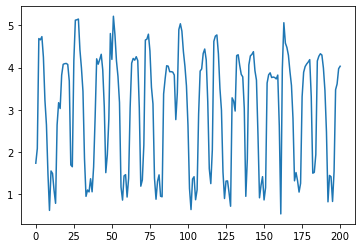

In [29]:
plt.plot(df1.speedOverGround.loc[0:200])

In [30]:
df1[['speedOverGround','accelPedalPos', 'EngineFuelRate']].describe()

,speedOverGround,accelPedalPos,EngineFuelRate
count,39193.000000,39193.000000,39193.000000
mean,3.013231,38.846986,17.659887
std,1.338580,18.051812,10.663652
min,0.500025,0.000000,0.450833
25%,1.595350,25.755667,9.671333
50%,3.439125,38.107167,15.405917
75%,4.113375,49.926619,23.159552
max,5.954200,99.427333,67.124000


In [31]:
# set the threshold for acceleration and deceleration
df1['accel_data']=0
accel_threshold = 0.3
decel_threshold = -0.3

# get speed and time data from dataset
speed_data = df1.speedOverGround
# time_data = df1.time
time_data = df1.time_xPorts

# compute the acceleration by calculating the difference in speed over time 
accel_data = np.diff(speed_data) / np.diff(time_data)
df1['accel_data'].iloc[1:]=accel_data; 

# select only the speeds that are within the acceleration threshold
cruis_sog = speed_data.iloc[1:][(accel_data < accel_threshold) & (accel_data > decel_threshold)]
cruis_index = df1.index[1:][(accel_data < accel_threshold) & (accel_data > decel_threshold)]
cruis_index

Int64Index([    3,     4,    11,    16,    18,    19,    20,    21,    24,
               27,
            ...
            39176, 39177, 39180, 39182, 39183, 39184, 39185, 39186, 39189,
            39191],
           dtype='int64', length=18159)

In [32]:
df1['accel_data'].describe()

count    38877.000000
mean        -0.028833
std          0.910523
min         -3.493600
25%         -0.442300
50%         -0.025450
75%          0.257713
max          3.969825
Name: accel_data, dtype: float64

In [33]:
df_north=df[(df.latitude>57.71) & (df.longitude<11.679)]
north_idx=df_north.index
print(df_north.shape)

df_mid=df[(df.latitude>57.705) & (df.longitude>11.679) & (df.longitude<11.69)]
mid_idx=df_mid.index
print(df_mid.shape)

df_south=df[(df.latitude<57.705) & (df.longitude>11.686)]
south_idx=df_south.index
print(df_south.shape)

df_direct=df[(df.Direct_RT==1)]
direct_idx=df_south.index
print(df_direct.shape)

df_NS=df[((df.latitude>57.71) & (df.longitude<11.679))| ((df.latitude<57.705) & (df.longitude>11.686)) ]
NS_idx=df_NS.index
print(df_NS.shape)

df_NS_direct=df[((df.latitude>57.71) & (df.longitude<11.679)) | ((df.latitude<57.705) & (df.longitude>11.686))
        | (df.Direct_RT==1)]
NS_direct_idx=df_NS_direct.index
print(df_NS_direct.shape)


(10933, 72)
(18269, 72)
(9608, 72)
(918, 72)
(20541, 72)
(20876, 72)


In [34]:
df1['accel_data'][cruis_index].describe()

count    18159.000000
mean        -0.007347
std          0.131984
min         -0.299900
25%         -0.084379
50%         -0.008500
75%          0.068388
max          0.299850
Name: accel_data, dtype: float64

### Plots of Eff and F1 Local or Global

In [35]:
df_st1=df[['distance', 'fuel', 'time', 'distance_norm','time_norm','fuel_norm', 
    'distance_total', 'time_total', 'fuel_total',
    'eff_score',
    'headingMagnetic', 'courseOverGroundTrue',
    'speedOverGround',]]

df_f1_tmp=df1[[ 'time_total', 'fuel_total']]/df1[[ 'time_total', 'fuel_total']].max()
df_f1_tmp.describe()
if local_Eff_fg==0:
    df_st1['F1_score']=2*(df_f1_tmp.time_total*df_f1_tmp.fuel_total)/(df_f1_tmp.time_total+df_f1_tmp.fuel_total)
if local_Eff_fg==1:
    df_st1['F1_score']=2*(df.time_norm*df.fuel_norm)/(df.time_norm+df.fuel_norm)

df_st1['RT_id']=df.RT_id

df_st1.describe()

,distance,fuel,time,distance_norm,time_norm,fuel_norm,distance_total,time_total,fuel_total,eff_score,headingMagnetic,courseOverGroundTrue,speedOverGround,F1_score,RT_id
count,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,0.170637,0.294331,0.935614,0.625051,0.513866,0.517214,3.827718,21.079905,6.620718,0.479524,195.362612,190.147295,3.013231,0.520476,856.264231
std,0.088203,0.177728,0.385428,0.322060,0.217921,0.270658,0.176935,1.991701,1.696207,0.088923,85.881704,88.759529,1.338580,0.088923,497.891048
min,0.000000,0.007514,0.000000,0.000000,0.000000,0.010359,2.809295,10.604470,1.370410,0.000000,1.943222,0.671456,0.500025,0.158853,0.000000
25%,0.078642,0.161189,0.819914,0.288808,0.389356,0.291707,3.765923,19.970190,5.466484,0.420183,140.762409,123.494808,1.595350,0.463992,433.000000
50%,0.201884,0.256765,0.983647,0.740795,0.524638,0.494319,3.828724,21.123173,6.539470,0.476184,179.173643,178.248263,3.439125,0.523816,850.000000
75%,0.241368,0.385993,1.021431,0.901356,0.629696,0.725393,3.902536,22.250911,7.707494,0.536008,248.849866,251.380119,4.113375,0.579817,1284.000000
max,0.359070,1.118733,4.376699,1.000000,1.000000,1.000000,6.294901,30.013149,15.577582,0.841147,359.040393,359.205347,5.954200,1.000000,1753.000000


In [36]:
print(df_st1.F1_score.shape)
print(df1.shape)
df1['F1_score']=df_st1.F1_score
print(df1.shape)

(39193,)
(39193, 72)
(39193, 72)


In [37]:
df1.F1_score.describe()

count    39193.000000
mean         0.520476
std          0.088923
min          0.158853
25%          0.463992
50%          0.523816
75%          0.579817
max          1.000000
Name: F1_score, dtype: float64

In [38]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

num=11

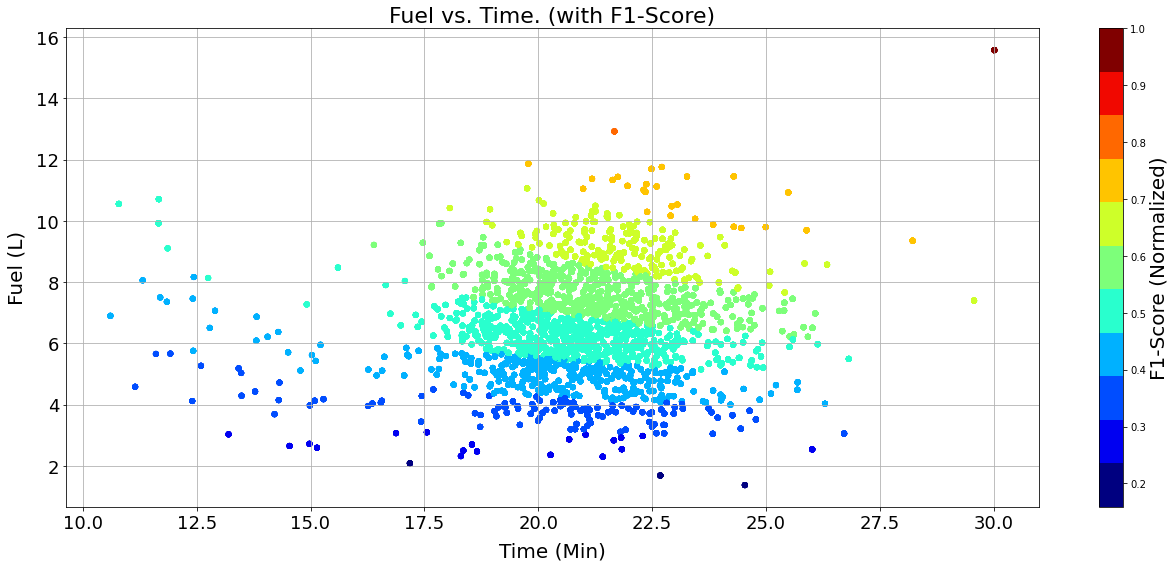

In [39]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(18,8))

if local_Eff_fg==0:
    im=plt.scatter(x=df_st1.time_total, y=df_st1.fuel_total, c=df_st1.F1_score,  cmap=discrete_cmap(num, 'jet'), s=25, label='F1_score (Normalized)')
    cb=plt.colorbar(im)
    cb.set_label("F1-Score (Normalized)", labelpad=3, fontsize=20)
    plt.ylabel('Fuel (L)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Min)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with F1-Score)',fontsize=22)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()

if local_Eff_fg==1:
    im=plt.scatter(x=df_st1.time_norm, y=df_st1.fuel_norm, c=df_st1.F1_score,  cmap=discrete_cmap(num, 'jet'), s=25, label='F1_score (Normalized)')
    cb=plt.colorbar(im)
    cb.set_label("F1-Score", labelpad=3, fontsize=20)

    plt.ylabel('Fuel (Normalized)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Normalized)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with F1-Score)',fontsize=22)
    plt.ylim(-0.05,1.1)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()

plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Plot_F1score_fltm_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show();

In [40]:
df1.F1_score.describe()

count    39193.000000
mean         0.520476
std          0.088923
min          0.158853
25%          0.463992
50%          0.523816
75%          0.579817
max          1.000000
Name: F1_score, dtype: float64

####  Adding the Eff_new to df1,  (Eff_new=1 - df1.F1_score)\
#### Then replacing the existing eff_score with Eff_new

In [41]:
df1['Eff_new']=1-df1.F1_score
df1['eff_score_old']=df1.eff_score
df1['eff_score']=df1.Eff_new
df1[['eff_score', 'Eff_new', 'eff_score_old']].describe()

,eff_score,Eff_new,eff_score_old
count,39193.000000,39193.000000,39193.000000
mean,0.479524,0.479524,0.479524
std,0.088923,0.088923,0.088923
min,0.000000,0.000000,0.000000
25%,0.420183,0.420183,0.420183
50%,0.476184,0.476184,0.476184
75%,0.536008,0.536008,0.536008
max,0.841147,0.841147,0.841147


#### Sorting the data df1 based on Eff_new, whrere the eff_score=Eff_new

In [42]:
df1_eff_sort=pd.DataFrame([])
df1_eff_sort1=df1.sort_values(by=['eff_score'], ascending=[False])
rt_id=df1_eff_sort1.RT_id.unique().tolist()
for id in rt_id:
#     rt_id=df1_eff_sort1.RT_id[0]
    df1_eff_sort=df1_eff_sort.append(df1_eff_sort1[(df1_eff_sort1.RT_id==id)].sort_values(by=['time_xPorts'], ascending=[True]))

df1_eff_sort.shape

(39193, 72)

In [43]:
df1_eff_sort.columns

Index(['Unnamed: 0', 'RT_id', 'time_xPorts', 'eff_score', 'latitude',
       'longitude', 'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       

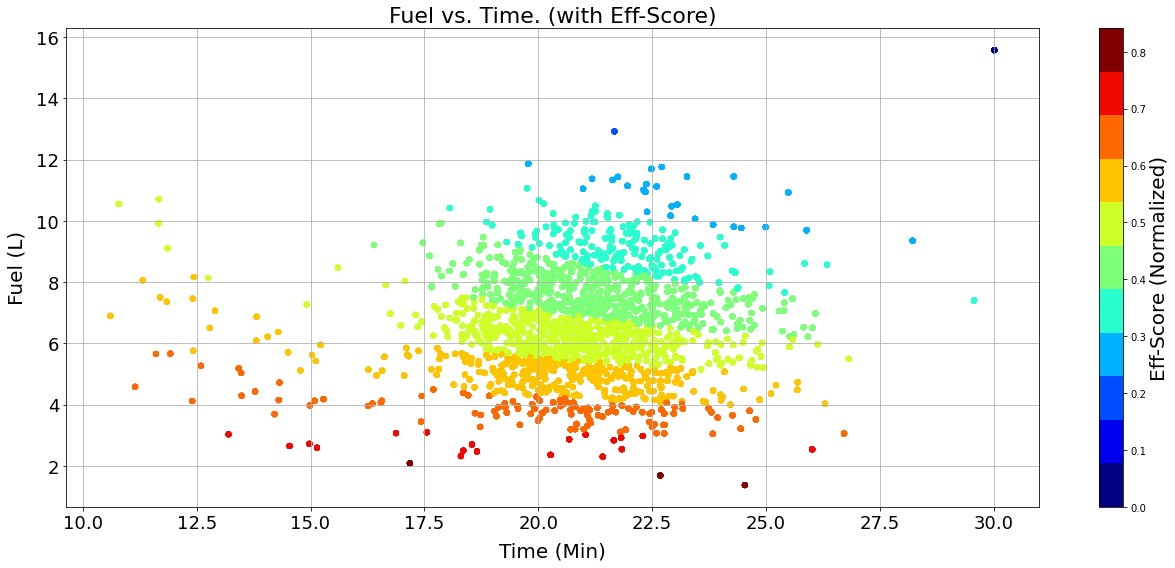

In [44]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(18,8))

if local_Eff_fg==0:
    im=plt.scatter(x=df1.time_total, y=df1.fuel_total, c=df1.Eff_new,  cmap=discrete_cmap(num, 'jet'), s=25, label='Eff-Score (Normalized)' )
    cb=plt.colorbar(im)
    cb.set_label("Eff-Score (Normalized)", labelpad=3, fontsize=20)

    plt.ylabel('Fuel (L)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Min)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with Eff-Score)',fontsize=22)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()
if local_Eff_fg==1:
    im=plt.scatter(x=df1.time_norm, y=df1.fuel_norm, c=df1.Eff_new,  cmap=discrete_cmap(num, 'jet'), s=25, label='Eff-Score (Normalized)')
    cb=plt.colorbar(im)
    cb.set_label("Eff-Score", labelpad=3, fontsize=18)

    plt.ylabel('Fuel (Normalized)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Normalized)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with Eff-Score)',fontsize=22)
    plt.ylim(-0.05,1.1)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()

plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Plot_New_Effscore_fltm_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show();

In [45]:
print(df1.shape)
print(df1_eff_sort.shape)

(39193, 72)
(39193, 72)


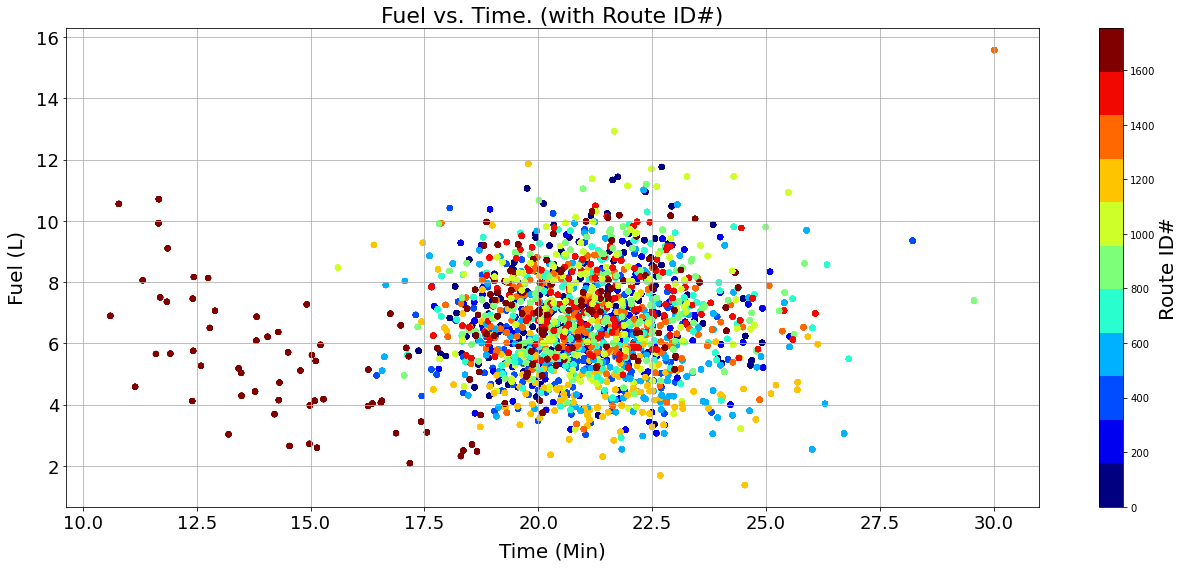

In [46]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(18,8))

if local_Eff_fg==0:
    im=plt.scatter(x=df1.time_total, y=df1.fuel_total, c=df1.RT_id,  cmap=discrete_cmap(num, 'jet'), s=25, label='RT_id' )
    cb=plt.colorbar(im)
    cb.set_label("Route ID#", labelpad=3, fontsize=20)

    plt.ylabel('Fuel (L)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Min)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with Route ID#)',fontsize=22)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()
if local_Eff_fg==1:
    im=plt.scatter(x=df1.time_norm, y=df1.fuel_norm, c=df1.Eff_new,  cmap=discrete_cmap(num, 'jet'), s=25, label='Eff-Score (Normalized)')
    cb=plt.colorbar(im)
    cb.set_label("Eff-Score", labelpad=3, fontsize=18)

    plt.ylabel('Fuel (Normalized)', fontsize=20, labelpad=10)
    plt.xlabel('Time (Normalized)', fontsize=20, labelpad=10)
    plt.yticks(fontsize=18);
    plt.xticks(fontsize=18, rotation = 0);
    plt.title('Fuel vs. Time. (with Eff-Score)',fontsize=22)
    plt.ylim(-0.05,1.1)
    # plt.legend(loc='upper left', fontsize=14)
    plt.grid()

plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Plot_RTid_fltm_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show();

In [47]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

num=11

### Plot Eff-Score vs. SOG

In [48]:
outputs=['speedOverGround']
inputs=['speedOverGround', 'RT_id']
wd_sz=27

if Eff_limit_fg==1:
    Xtr=df1.RT_id.unique()
    
if Eff_limit_fg!=1:
    Xtr=df1_eff_sort.RT_id.unique()
print(Xtr.shape)

# x_train1_rtid,x_valid1_rtid,x_test1_rtid = np.split(Xrt[:,0,-1],[int(train_pt*len(Xrt)),int(test_pt*len(Xrt))])
x_train1_rtid,x_valid1_rtid,x_test1_rtid = np.split(Xtr, [int(train_pt*len(Xtr)), int(test_pt*len(Xtr))]) 


print(x_train1_rtid.shape); print(x_valid1_rtid.shape); print(x_test1_rtid.shape)

(1754,)
(1227,)
(193,)
(334,)


In [49]:
df1_eff_sort.shape

(39193, 72)

In [50]:
df_st1=df[['distance', 'fuel', 'time', 'distance_norm','time_norm','fuel_norm', 
    'distance_total', 'time_total', 'fuel_total',
    'eff_score', 'F1_score', 'Eff_new',
    'headingMagnetic', 'courseOverGroundTrue',
    'speedOverGround',]]


df_st1['RT_id']=df1_eff_sort.RT_id

df_st1.describe()

,distance,fuel,time,distance_norm,time_norm,fuel_norm,distance_total,time_total,fuel_total,eff_score,F1_score,Eff_new,headingMagnetic,courseOverGroundTrue,speedOverGround,RT_id
count,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,0.170637,0.294331,0.935614,0.625051,0.513866,0.517214,3.827718,21.079905,6.620718,0.479524,0.520476,0.479524,195.362612,190.147295,3.013231,856.264231
std,0.088203,0.177728,0.385428,0.322060,0.217921,0.270658,0.176935,1.991701,1.696207,0.088923,0.088923,0.088923,85.881704,88.759529,1.338580,497.891048
min,0.000000,0.007514,0.000000,0.000000,0.000000,0.010359,2.809295,10.604470,1.370410,0.000000,0.158853,0.000000,1.943222,0.671456,0.500025,0.000000
25%,0.078642,0.161189,0.819914,0.288808,0.389356,0.291707,3.765923,19.970190,5.466484,0.420183,0.463992,0.420183,140.762409,123.494808,1.595350,433.000000
50%,0.201884,0.256765,0.983647,0.740795,0.524638,0.494319,3.828724,21.123173,6.539470,0.476184,0.523816,0.476184,179.173643,178.248263,3.439125,850.000000
75%,0.241368,0.385993,1.021431,0.901356,0.629696,0.725393,3.902536,22.250911,7.707494,0.536008,0.579817,0.536008,248.849866,251.380119,4.113375,1284.000000
max,0.359070,1.118733,4.376699,1.000000,1.000000,1.000000,6.294901,30.013149,15.577582,0.841147,1.000000,0.841147,359.040393,359.205347,5.954200,1753.000000


In [51]:
if local_Eff_fg==0:
    rt_ids=df1_eff_sort.RT_id.unique()
    dftest_avg=df1_eff_sort[df1_eff_sort.RT_id.isin(x_test1_rtid)].groupby('RT_id').mean()
    dftrain_avg=df1_eff_sort[~df1_eff_sort.RT_id.isin(x_test1_rtid)].groupby('RT_id').mean()

    dfst_test_avg=df_st1[df_st1.RT_id.isin(x_test1_rtid)].groupby('RT_id').mean()
    dfst_train_avg=df_st1[~df_st1.RT_id.isin(x_test1_rtid)].groupby('RT_id').mean()

    df_avg=df_st1.groupby('RT_id').mean()
    dfst_avg=df_st1.groupby('RT_id').mean()
    
if local_Eff_fg==1:
    dftest_avg=df1_eff_sort[df1_eff_sort.RT_id.isin(x_test1_rtid)]
    dftrain_avg=df1_eff_sort[~df1_eff_sort.RT_id.isin(x_test1_rtid)]

    dfst_test_avg=df_st1[df_st1.RT_id.isin(x_test1_rtid)]
    dfst_train_avg=df_st1[~df_st1.RT_id.isin(x_test1_rtid)]
    
    dftest_value=df1_eff_sort[df1_eff_sort.RT_id.isin(x_test1_rtid)]
    dftrain_value=df1_eff_sort[~df1_eff_sort.RT_id.isin(x_test1_rtid)]

    dfst_test_value=df_st1[df_st1.RT_id.isin(x_test1_rtid)]
    dfst_train_value=df_st1[~df_st1.RT_id.isin(x_test1_rtid)]

    df_avg=df_st1.groupby('RT_id').mean()
    dfst_avg=df_st1.groupby('RT_id').mean()
    
#     dftest_avg.describe()
#     dftrain_avg.describe()
#     dftest_value.describe()
#     dftrain_value.describe()  
#     df_avg.describe()

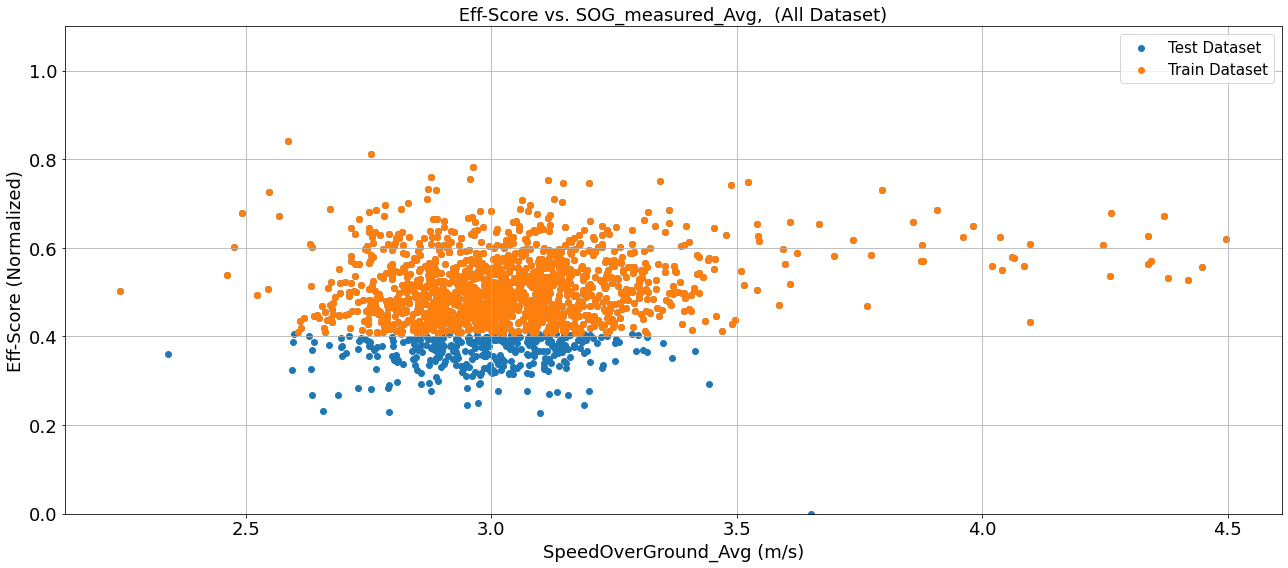

In [52]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))

    # fig=plt.subplots(figsize=(18,6))
    # plt.subplot(1,2,1)
    plt.scatter(df_avg.speedOverGround, df_avg.eff_score, label='Test Dataset')
    plt.scatter(dftrain_avg.speedOverGround, dftrain_avg.eff_score, label='Train Dataset')

    plt.title(' Eff-Score vs. SOG_measured_Avg,  (All Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    plt.legend( fontsize=15)
    plt.grid()
    
if local_Eff_fg==1:
    fig=plt.subplots(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.scatter(dftrain_value.speedOverGround, dftrain_value.eff_score, label='Train Dataset')

    plt.title(' Eff-Score vs. SOG_measured_Avg,  (Train Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


    plt.subplot(1,2,2)
    plt.scatter(dftest_value.speedOverGround, dftest_value.eff_score, color='orange', label='Test Dataset')
    plt.title(' Eff-Score vs. SOG_measured_Avg,  (Test Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    # plt.legend( fontsize=15)
    plt.grid()


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Eff_vs_SOG_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


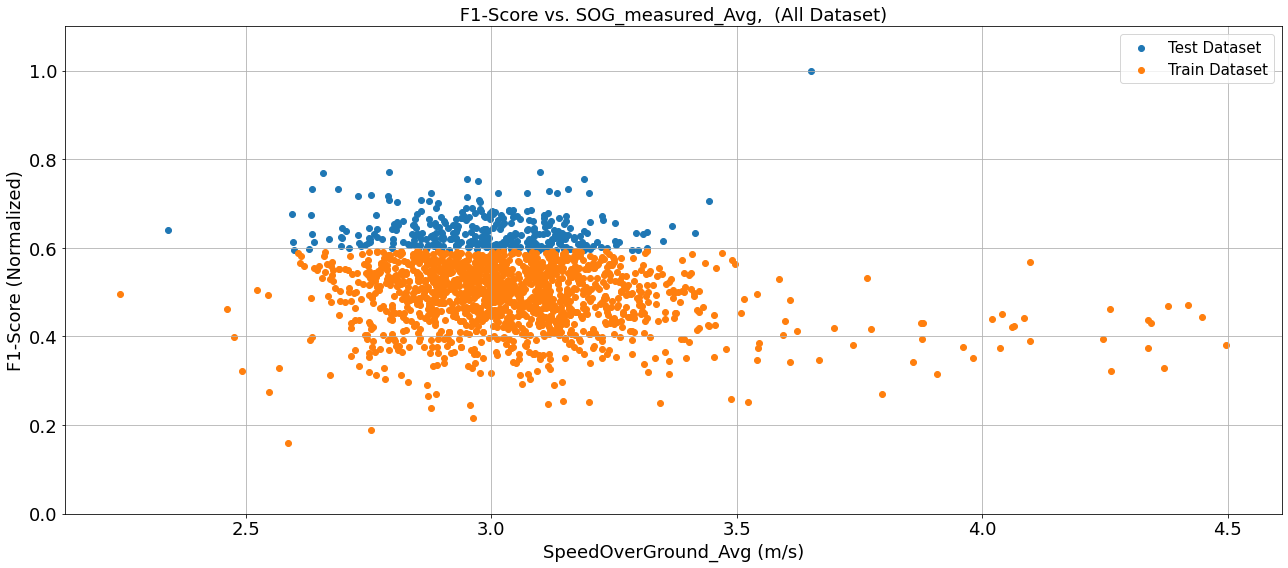

In [53]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))

    # fig=plt.subplots(figsize=(18,6))
    # plt.subplot(1,2,1)
    plt.scatter(dfst_test_avg.speedOverGround, dfst_test_avg.F1_score, label='Test Dataset')
    plt.scatter(dfst_train_avg.speedOverGround, dfst_train_avg.F1_score, label='Train Dataset')

    plt.title(' F1-Score vs. SOG_measured_Avg,  (All Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('F1-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    plt.legend( fontsize=15)
    plt.grid()
    
    
if local_Eff_fg==1:
    fig=plt.subplots(figsize=(18,6))
    
    plt.subplot(1,2,1)
    plt.scatter(dfst_train_value.speedOverGround, dfst_train_value.F1_score, label='Train Dataset')
    plt.title(' F1-Score vs. SOG_measured_Avg,  (Train Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('F1-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    # plt.legend( fontsize=15)
    plt.grid()


    plt.subplot(1,2,2)
    plt.scatter(dfst_test_value.speedOverGround, dfst_test_value.F1_score, color='orange', label='Test Dataset')
    plt.title(' F1-Score vs. SOG_measured_Avg,  (Test Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('F1-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    # plt.legend( fontsize=15)
    plt.grid()


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_F1_vs_SOG_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


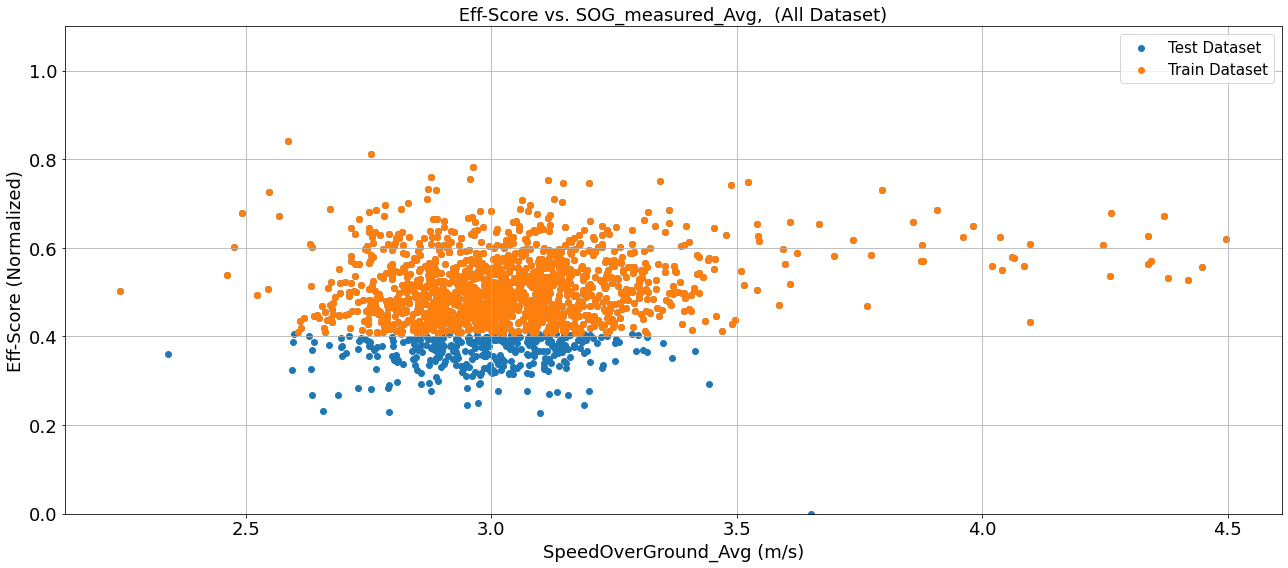

In [54]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))

    # fig=plt.subplots(figsize=(18,6))
    # plt.subplot(1,2,1)
    plt.scatter(df_avg.speedOverGround, df_avg.Eff_new, label='Test Dataset')
    plt.scatter(dftrain_avg.speedOverGround, dftrain_avg.Eff_new, label='Train Dataset')

    plt.title(' Eff-Score vs. SOG_measured_Avg,  (All Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    plt.legend( fontsize=15)
    plt.grid()
    
if local_Eff_fg==1:
    fig=plt.subplots(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.scatter(dftrain_avg.speedOverGround, dftrain_avg.Eff_new, label='Train Dataset')

    plt.title(' Eff-Score vs. SOG_measured_Avg,  (Train Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


    plt.subplot(1,2,2)
    plt.scatter(dftest_avg.speedOverGround, dftest_avg.Eff_new, color='orange', label='Test Dataset')
    plt.title(' Eff-Score vs. SOG_measured_Avg,  (Test Dataset) ',  fontsize=18)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=18)
    plt.ylabel('Eff-Score (Normalized)', fontsize=18)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

    # plt.legend( fontsize=15)
    plt.grid()


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_NewEff_vs_SOG_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


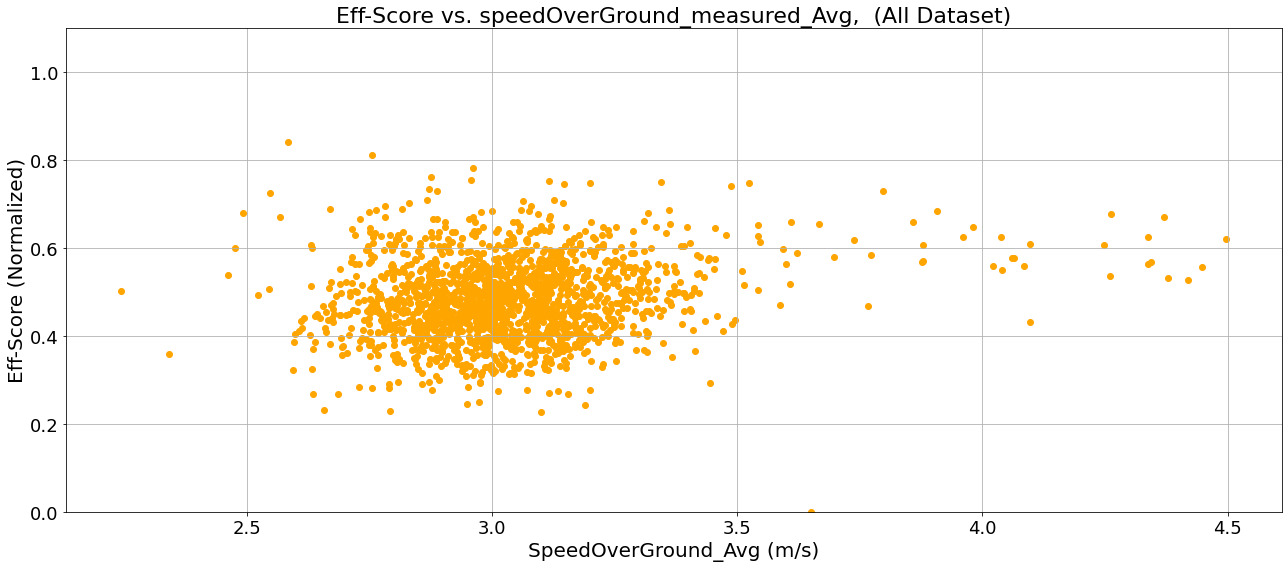

<Figure size 432x288 with 0 Axes>

In [55]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df_avg.speedOverGround, df_avg.Eff_new, label='Train Dataset', color='orange')

    plt.title(' Eff-Score vs. speedOverGround_measured_Avg,  (All Dataset) ',  fontsize=22)

    plt.xlabel('SpeedOverGround_Avg (m/s)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_SOG_avg_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  

if local_Eff_fg==1:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df1_eff_sort.speedOverGround, df1_eff_sort.Eff_new, label='Train Dataset', color='orange')

    plt.title(' Eff-Score vs. speedOverGround_measured,  (All Dataset) ',  fontsize=22)

    plt.xlabel('SpeedOverGround(m/s)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_SOG_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


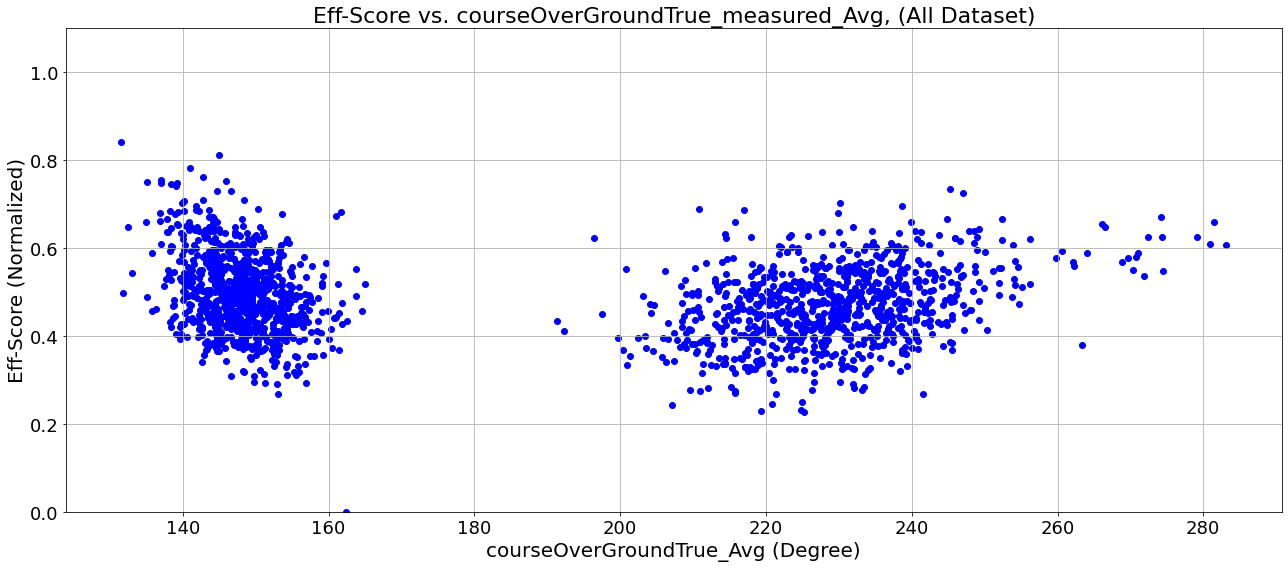

<Figure size 432x288 with 0 Axes>

In [56]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df_avg.courseOverGroundTrue, df_avg.Eff_new, label='Train Dataset', color='blue')

    plt.title(' Eff-Score vs. courseOverGroundTrue_measured_Avg, (All Dataset) ',  fontsize=22)

    plt.xlabel('courseOverGroundTrue_Avg (Degree)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_COG_avg_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  

if local_Eff_fg==1:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df1_eff_sort.headingMagnetic, df1_eff_sort.Eff_new, label='Train Dataset', color='blue')

    plt.title(' Eff-Score vs. courseOverGroundTrue_measured,  (All Dataset) ',  fontsize=22)

    plt.xlabel('courseOverGroundTrue (Degree)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_COG_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


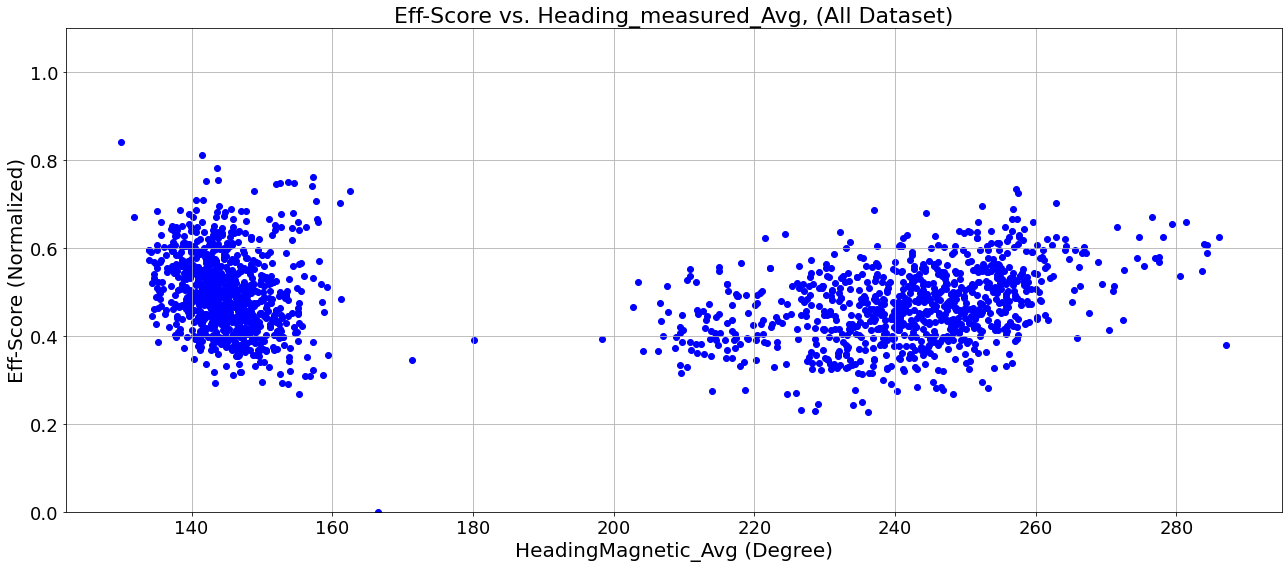

<Figure size 432x288 with 0 Axes>

In [57]:
if local_Eff_fg==0:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df_avg.headingMagnetic, df_avg.Eff_new, label='Train Dataset', color='blue')

    plt.title(' Eff-Score vs. Heading_measured_Avg, (All Dataset) ',  fontsize=22)

    plt.xlabel('HeadingMagnetic_Avg (Degree)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_Heading_avg_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  

if local_Eff_fg==1:
    fig = plt.figure(figsize=(18,8))
    plt.scatter(df1_eff_sort.headingMagnetic, df1_eff_sort.Eff_new, label='Train Dataset', color='blue')

    plt.title(' Eff-Score vs. Heading_measured,  (All Dataset) ',  fontsize=22)

    plt.xlabel('HeadingMagnetic (Degree)', fontsize=20)
    plt.ylabel('Eff-Score (Normalized)', fontsize=20)

    plt.tick_params(axis='y', labelsize=18) 
    plt.tick_params(axis='x', labelsize=18) 

    plt.ylim(0,1.1)

#     plt.legend( fontsize=15)
    plt.grid()
    


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Subplot_Alldata_NewEff_vs_Heading_loc_'+str(local_Eff_fg)+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show()  


In [58]:
df1.columns

Index(['Unnamed: 0', 'RT_id', 'time_xPorts', 'eff_score', 'latitude',
       'longitude', 'accelPedalPos', 'headingMagnetic', 'courseOverGroundTrue',
       'speedOverGround', 'pitch', 'roll', 'windSpeedOverGround',
       'windDirectionTrue', 'fuelPerStep', 'deltaDistance',
       'courseHeadingDiff', 'distanceFromDock', 'distanceToNextDock',
       'distanceToPreviousDock', 'accumDistLeg', 'accumFuelLeg',
       'accumTimeLeg', 'directionTrue', 'EngineFuelRate', 'speedApparent',
       'wind_course_diff', 'distance', 'fuel', 'time', 'time_norm',
       'distance_norm', 'fuel_norm', 'duration', 'fuel_total', 'time_total',
       'distance_total', 'engineFuelRate', 'windSpeed', 'windDirection',
       'waveheight', 'wavedirect', 'waveperiod', 'wavedrag_coeff',
       'speedOverGround_poly2', 'speedOverGround_poly3', 'fuel_Sp_formula',
       'speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5',
       'meanwaveperiod', 'heading_wave', 'heading_wind', 'Cos_HWaveP',
       

In [59]:
df1.shape

(39193, 72)

### Plot histograms of fuel, time, distance for different route sections

#### Calculate the fuel consumption in different sections on the route

In [60]:
dist_latlon=0
# Exclud_port=0; ### include ports data
Exclud_port=1; ### exclude ports data

In [61]:
df_mid=df[(df1.latitude>57.705) & (df1.longitude>11.682) & (df1.longitude<11.686)]
mid_idx=df_mid.index
print(df_mid.shape)
df_north=df[(df.latitude>57.71) & (df.longitude<11.682)]
north_idx=df_north.index
print(df_north.shape)
df_south=df1[(df1.latitude<57.71) & (df.longitude>11.686)]
south_idx=df_south.index
print(df_south.shape)
print(df_mid.shape[0]+df_north.shape[0]+df_south.shape[0])

(12770, 72)
(12929, 72)
(13160, 72)
38859


In [62]:
df_sel=df_mid
df_R=df_mid

R_rt={}; R_t={}; R_d={}; R_f={}; 

df_stats={}

dfst_time_ExPorts=[]
dist=[]
tmsan=[]
fuelcns=[]
df_st=pd.DataFrame([])
df_st_rt=pd.DataFrame([])
# df_st_rt.index=['fuel', 'time', 'distance', 'Time_ExPorts','Time_dtsp_avg']
df_st_rt.index=['fuel', 'time', 'distance', 'sog_avg','Time_dtsp_avg']

dfst_fuel=pd.DataFrame([])
dfst_distance=pd.DataFrame([])
dfst_time=pd.DataFrame([])
df_info=pd.DataFrame([])


if Exclud_port==0:
    dfcor=df_sel
if Exclud_port==1:
#     dfcor=df_all_present1[~(df_all_present1.speedOverGround<0.5) & ~(df_all_present1.deltaDistance<0.1)]
    dfcor=df_sel[~(df_sel.speedOverGround<0.5) & ~(df_sel.accumDistLeg<50)]


dfcor['lat1']=dfcor['latitude']
dfcor['lat2']=dfcor['latitude'].shift(-1)
dfcor['lon1']=dfcor['longitude']
dfcor['lon2']=dfcor['longitude'].shift(-1)


dfcor['dfr1']=dfcor['EngineFuelRate']
dfcor = dfcor.reset_index(drop=True)
dfcr=dfcor[['lat1', 'lat2', 'lon1', 'lon2']]
dfcr.iloc[-1]=dfcr.iloc[-2] 
Radious = 6373.0
lat1=np.radians(dfcr['lat1'])
lon1=np.radians(dfcr['lon1'])
lat2=np.radians(dfcr['lat2'])
lon2=np.radians(dfcr['lon2'])
dlon = lon2 - lon1
dlat = lat2 - lat1
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

if dist_latlon==0:
    distance = Radious * c

if dist_latlon==1:
    distance=dfcor['accumDistLeg']/1000

if tempo_res=='5min':
    d_feulcns=dfcor['dfr1']/(12)   
if tempo_res=='2min':
    d_feulcns=dfcor['dfr1']/(30)   
if tempo_res=='1min':
    d_feulcns=dfcor['dfr1']/(60)
if tempo_res=='1S':
    d_feulcns=dfcor['dfr1']/(60*60)
if tempo_res=='10S':
    d_feulcns=dfcor['dfr1']/(60*60)*10
if tempo_res=='30S':
    d_feulcns=dfcor['dfr1']/(60*60)*30
    
if tempo_res=='5min':
    dfst_time_ExPorts.append(int(len(dfcor)/5))
if tempo_res=='2min':
    dfst_time_ExPorts.append(int(len(dfcor)/2))
if tempo_res=='1min':
    dfst_time_ExPorts.append(len(dfcor))
if tempo_res=='1S':
    dfst_time_ExPorts.append(int(len(dfcor))/60)
if tempo_res=='10S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*10)
if tempo_res=='30S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*30)

time_i=distance/dfcor['speedOverGround']*1000/3600
time_i=time_i.replace(np.inf,0)
time_i=time_i.replace(np.nan,0)

time_i_meas=time_i
distance_meas=distance
sog_meas=dfcor['speedOverGround']

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

indx_t1=time_i[~(time_i>time_i.quantile(0.90))].index

R_t=time_i.iloc[indx_t1].sum()
# R_t=time_i.sum()
R_d=distance.sum()
R_f=d_feulcns.sum()
df_st['date']=df_R.index
df_st['fuel']=R_f
df_st['time']=R_t
df_st['distance']=R_d
df_st['Time_ExPorts']=dfst_time_ExPorts[0]

df_st_rt['Middle']=np.nan

df_st_rt['Middle'].loc['fuel']=R_f
df_st_rt['Middle'].loc['time']=R_t
df_st_rt['Middle'].loc['distance']=R_d
df_st_rt['Middle'].loc['Time_ExPorts']=dfst_time_ExPorts[0]
df_st_rt['Middle'].loc['sog_avg']=dfcor['speedOverGround'].mean()

Time_dtsp_avg=distance.mean()/(dfcor['speedOverGround']).mean()*1000/60
df_st_rt['Middle'].loc['Time_dtsp_avg']=Time_dtsp_avg

# df_info
df_st=df_st.set_index(['date'])
# df_st.T

df_stats['Middle']=df_st_rt
df_st_rt_mid=df_stats['Middle']
df_st_rt_mid

,Middle
fuel,1690.999254
time,102.120950
distance,870.744114
sog_avg,2.014703
Time_dtsp_avg,0.794009


In [63]:
df_sel=df_north
df_R=df_north

R_rt={}; R_t={}; R_d={}; R_f={}; 

df_stats={}

dfst_time_ExPorts=[]
dist=[]
tmsan=[]
fuelcns=[]
df_st=pd.DataFrame([])
df_st_rt=pd.DataFrame([])
# df_st_rt.index=['fuel', 'time', 'distance', 'Time_ExPorts','Time_dtsp_avg']
df_st_rt.index=['fuel', 'time', 'distance', 'sog_avg','Time_dtsp_avg']

dfst_fuel=pd.DataFrame([])
dfst_distance=pd.DataFrame([])
dfst_time=pd.DataFrame([])
df_info=pd.DataFrame([])


if Exclud_port==0:
    dfcor=df_sel
if Exclud_port==1:
#     dfcor=df_all_present1[~(df_all_present1.speedOverGround<0.5) & ~(df_all_present1.deltaDistance<0.1)]
    dfcor=df_sel[~(df_sel.speedOverGround<0.5) & ~(df_sel.accumDistLeg<50)]


dfcor['lat1']=dfcor['latitude']
dfcor['lat2']=dfcor['latitude'].shift(-1)
dfcor['lon1']=dfcor['longitude']
dfcor['lon2']=dfcor['longitude'].shift(-1)


dfcor['dfr1']=dfcor['EngineFuelRate']
dfcor = dfcor.reset_index(drop=True)
dfcr=dfcor[['lat1', 'lat2', 'lon1', 'lon2']]
dfcr.iloc[-1]=dfcr.iloc[-2] 
Radious = 6373.0
lat1=np.radians(dfcr['lat1'])
lon1=np.radians(dfcr['lon1'])
lat2=np.radians(dfcr['lat2'])
lon2=np.radians(dfcr['lon2'])
dlon = lon2 - lon1
dlat = lat2 - lat1
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

if dist_latlon==0:
    distance = Radious * c

if dist_latlon==1:
    distance=dfcor['accumDistLeg']/1000

if tempo_res=='5min':
    d_feulcns=dfcor['dfr1']/(12)   
if tempo_res=='2min':
    d_feulcns=dfcor['dfr1']/(30)   
if tempo_res=='1min':
    d_feulcns=dfcor['dfr1']/(60)
if tempo_res=='1S':
    d_feulcns=dfcor['dfr1']/(60*60)
if tempo_res=='10S':
    d_feulcns=dfcor['dfr1']/(60*60)*10
if tempo_res=='30S':
    d_feulcns=dfcor['dfr1']/(60*60)*30
    
if tempo_res=='5min':
    dfst_time_ExPorts.append(int(len(dfcor)/5))
if tempo_res=='2min':
    dfst_time_ExPorts.append(int(len(dfcor)/2))
if tempo_res=='1min':
    dfst_time_ExPorts.append(len(dfcor))
if tempo_res=='1S':
    dfst_time_ExPorts.append(int(len(dfcor))/60)
if tempo_res=='10S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*10)
if tempo_res=='30S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*30)

time_i=distance/dfcor['speedOverGround']*1000/3600
time_i=time_i.replace(np.inf,0)
time_i=time_i.replace(np.nan,0)

time_i_meas=time_i
distance_meas=distance
sog_meas=dfcor['speedOverGround']

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

indx_t1=time_i[~(time_i>time_i.quantile(0.90))].index

R_t=time_i.iloc[indx_t1].sum()
R_t=time_i.sum()
R_d=distance.sum()
R_f=d_feulcns.sum()
df_st['date']=df_R.index
df_st['fuel']=R_f
df_st['time']=R_t
df_st['distance']=R_d
df_st['Time_ExPorts']=dfst_time_ExPorts[0]

df_st_rt['North']=np.nan

df_st_rt['North'].loc['fuel']=R_f
df_st_rt['North'].loc['time']=R_t
df_st_rt['North'].loc['distance']=R_d
df_st_rt['North'].loc['Time_ExPorts']=dfst_time_ExPorts[0]
df_st_rt['North'].loc['sog_avg']=dfcor['speedOverGround'].mean()

Time_dtsp_avg=distance.mean()/(dfcor['speedOverGround']).mean()*1000/60
df_st_rt['North'].loc['Time_dtsp_avg']=Time_dtsp_avg

# df_info
df_st=df_st.set_index(['date'])
# df_st.T

df_stats['North']=df_st_rt
df_st_rt_north=df_stats['North']
df_st_rt_north

,North
fuel,3906.723727
time,255.593672
distance,3017.394011
sog_avg,3.675373
Time_dtsp_avg,1.131195


In [64]:
df_sel=df_south
df_R=df_south

R_rt={}; R_t={}; R_d={}; R_f={}; 

df_stats={}

dfst_time_ExPorts=[]
dist=[]
tmsan=[]
fuelcns=[]
df_st=pd.DataFrame([])
df_st_rt=pd.DataFrame([])
# df_st_rt.index=['fuel', 'time', 'distance', 'Time_ExPorts','Time_dtsp_avg']
df_st_rt.index=['fuel', 'time', 'distance', 'sog_avg','Time_dtsp_avg']

dfst_fuel=pd.DataFrame([])
dfst_distance=pd.DataFrame([])
dfst_time=pd.DataFrame([])
df_info=pd.DataFrame([])


if Exclud_port==0:
    dfcor=df_sel
if Exclud_port==1:
#     dfcor=df_all_present1[~(df_all_present1.speedOverGround<0.5) & ~(df_all_present1.deltaDistance<0.1)]
    dfcor=df_sel[~(df_sel.speedOverGround<0.5) & ~(df_sel.accumDistLeg<50)]


dfcor['lat1']=dfcor['latitude']
dfcor['lat2']=dfcor['latitude'].shift(-1)
dfcor['lon1']=dfcor['longitude']
dfcor['lon2']=dfcor['longitude'].shift(-1)


dfcor['dfr1']=dfcor['EngineFuelRate']
dfcor = dfcor.reset_index(drop=True)
dfcr=dfcor[['lat1', 'lat2', 'lon1', 'lon2']]
dfcr.iloc[-1]=dfcr.iloc[-2] 
Radious = 6373.0
lat1=np.radians(dfcr['lat1'])
lon1=np.radians(dfcr['lon1'])
lat2=np.radians(dfcr['lat2'])
lon2=np.radians(dfcr['lon2'])
dlon = lon2 - lon1
dlat = lat2 - lat1
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

if dist_latlon==0:
    distance = Radious * c

if dist_latlon==1:
    distance=dfcor['accumDistLeg']/1000

if tempo_res=='5min':
    d_feulcns=dfcor['dfr1']/(12)   
if tempo_res=='2min':
    d_feulcns=dfcor['dfr1']/(30)   
if tempo_res=='1min':
    d_feulcns=dfcor['dfr1']/(60)
if tempo_res=='1S':
    d_feulcns=dfcor['dfr1']/(60*60)
if tempo_res=='10S':
    d_feulcns=dfcor['dfr1']/(60*60)*10
if tempo_res=='30S':
    d_feulcns=dfcor['dfr1']/(60*60)*30
    
if tempo_res=='5min':
    dfst_time_ExPorts.append(int(len(dfcor)/5))
if tempo_res=='2min':
    dfst_time_ExPorts.append(int(len(dfcor)/2))
if tempo_res=='1min':
    dfst_time_ExPorts.append(len(dfcor))
if tempo_res=='1S':
    dfst_time_ExPorts.append(int(len(dfcor))/60)
if tempo_res=='10S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*10)
if tempo_res=='30S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*30)

time_i=distance/dfcor['speedOverGround']*1000/3600
time_i=time_i.replace(np.inf,0)
time_i=time_i.replace(np.nan,0)

time_i_meas=time_i
distance_meas=distance
sog_meas=dfcor['speedOverGround']

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

indx_t1=time_i[~(time_i>time_i.quantile(0.90))].index

R_t=time_i.iloc[indx_t1].sum()
# R_t=time_i.sum()
R_d=distance.sum()
R_f=d_feulcns.sum()
df_st['date']=df_R.index
df_st['fuel']=R_f
df_st['time']=R_t
df_st['distance']=R_d
df_st['Time_ExPorts']=dfst_time_ExPorts[0]

df_st_rt['South']=np.nan

df_st_rt['South'].loc['fuel']=R_f
df_st_rt['South'].loc['time']=R_t
df_st_rt['South'].loc['distance']=R_d
df_st_rt['South'].loc['Time_ExPorts']=dfst_time_ExPorts[0]
df_st_rt['South'].loc['sog_avg']=dfcor['speedOverGround'].mean()

Time_dtsp_avg=distance.mean()/(dfcor['speedOverGround']).mean()*1000/60
df_st_rt['South'].loc['Time_dtsp_avg']=Time_dtsp_avg

# df_info
df_st=df_st.set_index(['date'])
# df_st.T

df_stats['South']=df_st_rt
df_st_rt_south=df_stats['South']
df_st_rt_south

,South
fuel,4298.798133
time,175.000229
distance,3375.147228
sog_avg,3.778906
Time_dtsp_avg,1.158076


In [65]:
df_NS_direct.shape

(20876, 72)

In [66]:
df_sel=df_direct
df_R=df_direct

R_rt={}; R_t={}; R_d={}; R_f={}; 

df_stats={}

dfst_time_ExPorts=[]
dist=[]
tmsan=[]
fuelcns=[]
df_st=pd.DataFrame([])
df_st_rt=pd.DataFrame([])
# df_st_rt.index=['fuel', 'time', 'distance', 'Time_ExPorts','Time_dtsp_avg']
df_st_rt.index=['fuel', 'time', 'distance', 'sog_avg','Time_dtsp_avg']

dfst_fuel=pd.DataFrame([])
dfst_distance=pd.DataFrame([])
dfst_time=pd.DataFrame([])
df_info=pd.DataFrame([])


if Exclud_port==0:
    dfcor=df_sel
if Exclud_port==1:
#     dfcor=df_all_present1[~(df_all_present1.speedOverGround<0.5) & ~(df_all_present1.deltaDistance<0.1)]
    dfcor=df_sel[~(df_sel.speedOverGround<0.5) & ~(df_sel.accumDistLeg<50)]


dfcor['lat1']=dfcor['latitude']
dfcor['lat2']=dfcor['latitude'].shift(-1)
dfcor['lon1']=dfcor['longitude']
dfcor['lon2']=dfcor['longitude'].shift(-1)


dfcor['dfr1']=dfcor['EngineFuelRate']
dfcor = dfcor.reset_index(drop=True)
dfcr=dfcor[['lat1', 'lat2', 'lon1', 'lon2']]
dfcr.iloc[-1]=dfcr.iloc[-2] 
Radious = 6373.0
lat1=np.radians(dfcr['lat1'])
lon1=np.radians(dfcr['lon1'])
lat2=np.radians(dfcr['lat2'])
lon2=np.radians(dfcr['lon2'])
dlon = lon2 - lon1
dlat = lat2 - lat1
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

if dist_latlon==0:
    distance = Radious * c

if dist_latlon==1:
    distance=dfcor['accumDistLeg']/1000

if tempo_res=='5min':
    d_feulcns=dfcor['dfr1']/(12)   
if tempo_res=='2min':
    d_feulcns=dfcor['dfr1']/(30)   
if tempo_res=='1min':
    d_feulcns=dfcor['dfr1']/(60)
if tempo_res=='1S':
    d_feulcns=dfcor['dfr1']/(60*60)
if tempo_res=='10S':
    d_feulcns=dfcor['dfr1']/(60*60)*10
if tempo_res=='30S':
    d_feulcns=dfcor['dfr1']/(60*60)*30
    
if tempo_res=='5min':
    dfst_time_ExPorts.append(int(len(dfcor)/5))
if tempo_res=='2min':
    dfst_time_ExPorts.append(int(len(dfcor)/2))
if tempo_res=='1min':
    dfst_time_ExPorts.append(len(dfcor))
if tempo_res=='1S':
    dfst_time_ExPorts.append(int(len(dfcor))/60)
if tempo_res=='10S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*10)
if tempo_res=='30S':
    dfst_time_ExPorts.append(int(len(dfcor))/60*30)

time_i=distance/dfcor['speedOverGround']*1000/3600
time_i=time_i.replace(np.inf,0)
time_i=time_i.replace(np.nan,0)

time_i_meas=time_i
distance_meas=distance
sog_meas=dfcor['speedOverGround']

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

df_info['fuel']=dfcor['dfr1'].values
df_info['distance']=distance.values
df_info['time']=time_i.values

indx_t1=time_i[~(time_i>time_i.quantile(0.90))].index

R_t=time_i.iloc[indx_t1].sum()
# R_t=time_i.sum()
R_d=distance.sum()
R_f=d_feulcns.sum()
df_st['date']=df_R.index
df_st['fuel']=R_f
df_st['time']=R_t
df_st['distance']=R_d
df_st['Time_ExPorts']=dfst_time_ExPorts[0]

df_st_rt['Direct']=np.nan

df_st_rt['Direct'].loc['fuel']=R_f
df_st_rt['Direct'].loc['time']=R_t
df_st_rt['Direct'].loc['distance']=R_d
df_st_rt['Direct'].loc['Time_ExPorts']=dfst_time_ExPorts[0]
df_st_rt['Direct'].loc['sog_avg']=dfcor['speedOverGround'].mean()

Time_dtsp_avg=distance.mean()/(dfcor['speedOverGround']).mean()*1000/60
df_st_rt['Direct'].loc['Time_dtsp_avg']=Time_dtsp_avg

# df_info
df_st=df_st.set_index(['date'])
# df_st.T

df_stats['Direct']=df_st_rt
df_st_rt_NSdir=df_stats['Direct']
df_st_rt_NSdir

,Direct
fuel,318.050083
time,11.572183
distance,212.739023
sog_avg,3.593222
Time_dtsp_avg,1.111217


#### Plot  fuel from different parts

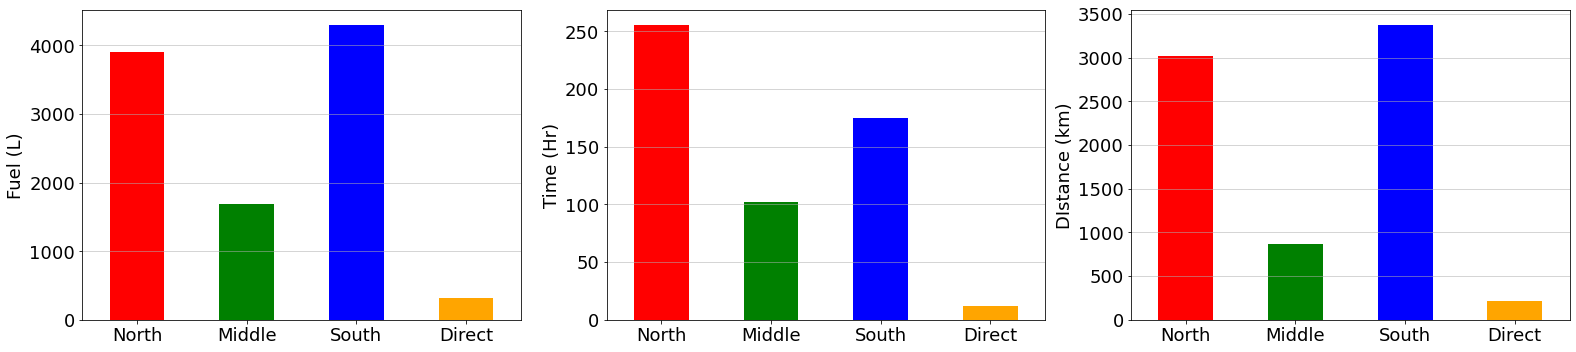

In [67]:
df_st_rt = pd.concat([df_st_rt_north, df_st_rt_mid, df_st_rt_south, df_st_rt_NSdir], axis=1) 

fig, ax = plt.subplots(figsize=(22,5))
plt.subplot(1,3,1)
df_st_rt.T['fuel'].plot.bar(color=['red', 'green', 'blue', 'orange'])
plt.grid(axis='y', alpha=0.65)
plt.ylabel('Fuel (L)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0, fontsize=18)

plt.subplot(1,3,2)
df_st_rt.T['time'].plot.bar(color=['red', 'green', 'blue','orange'])
plt.grid(axis='y', alpha=0.65)
plt.ylabel('Time (Hr)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0, fontsize=18) 

plt.subplot(1,3,3)
df_st_rt.T['distance'].plot.bar(color=['red', 'green', 'blue','orange'])
plt.grid(axis='y', alpha=0.65)
plt.ylabel('DIstance (km)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0, fontsize=18) 


plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Barplots_alldata_Fuel_time_distance'+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.show() 



In [68]:
df1.shape

(39193, 72)

### Plot Routes (just for illustration)

In [69]:
df_Raw_RT1=df1[(df1.RT_id==15)]
df_Raw_RT1.shape

(24, 72)

In [70]:
df_RT=df_Raw_RT1
df_RT = df_RT.set_index(df_RT['date'])
df_RT1=df_RT.resample('1S').mean()

# # df = df.dropna()
# df=df.reset_index()
# df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)

df_filled1=df_RT1.interpolate(method='linear', limit_direction='forward', axis=0)
df_filled2=df_filled1.interpolate(method='linear', limit_direction='backward', axis=0)

dfplot_RT=df_filled2
dfplot_RT.shape

(1921, 71)

In [71]:
df_Raw_RT2=df1[(df1.RT_id==1710)]
# df_Raw_RT2=df1[(df1.RT_id==1720)]
df_Raw_RT2=df1[(df1.RT_id==1740)]
# df_Raw_RT2=df1[(df1.RT_id==1725)]
# df_Raw_RT2=df1[(df1.RT_id==1731)]

df_Raw_RT2.shape

(16, 72)

In [72]:
df_RT21=df_Raw_RT2
df_RT22 = df_RT21.set_index(df_RT21['date'])
df_RT2=df_RT22.resample('1S').mean()

# # df = df.dropna()
# df=df.reset_index()
# df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)

df_filled1=df_RT2.interpolate(method='linear', limit_direction='forward', axis=0)
df_filled2=df_filled1.interpolate(method='linear', limit_direction='backward', axis=0)

dfplot_RT2=df_filled2
dfplot_RT2.shape

(901, 71)

In [73]:
dfplot_rts=pd.concat([dfplot_RT, dfplot_RT2], axis=0)
dfplot_rts.shape

(2822, 71)

In [74]:
dfplot_rts

,Unnamed: 0,RT_id,time_xPorts,eff_score,latitude,longitude,accelPedalPos,headingMagnetic,courseOverGroundTrue,speedOverGround,...,windSpeed_cds,windDirection_cds,wind_head_diff,accel_data,F1_score,Eff_new,eff_score_old,local_eff_score,Gr_Ock_fg,Direct_RT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18 16:39:00,651.000000,15.0,1.000000,0.373581,57.695217,11.687909,66.342778,119.216408,77.668927,2.587150,...,10.181156,271.007721,119.216408,-0.049819,0.626419,0.373581,0.373581,0.313155,1.0,0.0
2020-01-18 16:39:01,651.016667,15.0,1.016667,0.373581,57.695243,11.687941,66.535201,121.030488,80.097115,2.630662,...,10.181186,271.008050,121.030488,-0.005477,0.626419,0.373581,0.373581,0.314030,1.0,0.0
2020-01-18 16:39:02,651.033333,15.0,1.033333,0.373581,57.695269,11.687973,66.727625,122.844569,82.525302,2.674174,...,10.181216,271.008378,122.844569,0.038865,0.626419,0.373581,0.373581,0.314906,1.0,0.0
2020-01-18 16:39:03,651.050000,15.0,1.050000,0.373581,57.695295,11.688005,66.920049,124.658649,84.953490,2.717685,...,10.181246,271.008707,124.658649,0.083208,0.626419,0.373581,0.373581,0.315781,1.0,0.0
2020-01-18 16:39:04,651.066667,15.0,1.066667,0.373581,57.695321,11.688037,67.112472,126.472730,87.381677,2.761197,...,10.181275,271.009035,126.472730,0.127550,0.626419,0.373581,0.373581,0.316656,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-25 06:34:56,38872.933333,1740.0,15.933333,0.503400,57.695095,11.687012,32.230527,224.380964,244.626766,1.119658,...,13.655416,174.662298,224.380964,-1.526177,0.496600,0.503400,0.503400,0.543970,0.0,1.0
2020-10-25 06:34:57,38872.950000,1740.0,15.950000,0.503400,57.695089,11.686981,32.455720,224.509600,244.725114,1.093087,...,13.655485,174.661919,224.509600,-1.543195,0.496600,0.503400,0.503400,0.535827,0.0,1.0
2020-10-25 06:34:58,38872.966667,1740.0,15.966667,0.503400,57.695083,11.686949,32.680913,224.638236,244.823462,1.066517,...,13.655553,174.661540,224.638236,-1.560213,0.496600,0.503400,0.503400,0.527683,0.0,1.0


In [75]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [76]:
###################################################
# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)
###################################################
output_notebook()

# var2='speedOverGround'
var2='EngineFuelRate'
# var2='EngineSpeed'
# var2='speedApparent'


dfloc=dfplot_rts

dfloc['coordinates'] = list(zip(dfloc['latitude'], dfloc['longitude']))

# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in dfloc['coordinates']]
# Create mercator column in our df
dfloc['mercator'] = mercators

# Split that column out into two separate cols - mercator_x and mercator_y
dfloc[['mercator_x', 'mercator_y']] = dfloc['mercator'].apply(pd.Series)
####################################################

# Select tile set to use
chosentile = get_provider(Vendors.STAMEN_TERRAIN)
# chosentile = get_provider(Vendors.WIKIMEDIA)
chosentile = get_provider(WIKIMEDIA)

# Choose palette
# palette = PRGn[11]
# palette = PRGn[8]
from bokeh.palettes import Plasma256
palette=Plasma256

# Tell Bokeh to use df as the source of the data
source = ColumnDataSource(data=dfloc)

# Define color mapper - which column will define the colour of the data points
# Define color mapper - which column will define the colour of the data points
color_mapper = linear_cmap(field_name = var2, palette = palette, low = dfloc[var2].min(), high = dfloc[var2].max())
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                    formatter = NumeralTickFormatter(format='0.0[0000]'), 
                    label_standoff = 13, width=8, location=(0,0))

q = figure(title ='Vessel Route: Grötö-Kalvsund-Framnäs-Öckero, Gothenburg, Sweden '+var2, x_axis_type="mercator", y_axis_type="mercator", 
            x_axis_label = 'Longitude', y_axis_label = 'Latitude')
q.add_layout(color_bar, 'right')


# Add map tile
q.add_tile(chosentile)
  #Defines color bar    
q.circle(x = 'mercator_x', y = 'mercator_y', line_color=color_mapper, color = color_mapper, source=source, size=2, fill_color= color_mapper, fill_alpha =0.7)

q.add_tile(chosentile)



show(q)

Loading BokehJS ...

In [77]:
Rt_i=[]; sog_avg=[]; efr_avg=[]
for i in list(range(1692,1753)):
    df1[df1.RT_id==i]
    sog_avg.append(df1[df1.RT_id==i].speedOverGround.mean())
    efr_avg.append(df1[df1.RT_id==i].EngineFuelRate.mean())
    Rt_i.append(i)
    df_avg=pd.DataFrame({'Rt_i': Rt_i, 'sog_avg':sog_avg, 'EngFLRate_avg':efr_avg})

In [78]:
df_avg.describe()

,Rt_i,sog_avg,EngFLRate_avg
count,61.000000,61.000000,61.000000
mean,1722.000000,3.631833,22.797097
std,17.752934,0.523614,10.089460
min,1692.000000,2.244104,7.348759
25%,1707.000000,3.290127,15.487337
50%,1722.000000,3.608642,20.578184
75%,1737.000000,4.039448,28.775771
max,1752.000000,4.497164,49.656822


In [79]:
df_avg.sort_values(by=['EngFLRate_avg'], ascending=[False])
# df_avg.sort_values(by=['EngFLRate_avg'], ascending=[False]).head(60)

,Rt_i,sog_avg,EngFLRate_avg
33,1725,4.418764,49.656822
58,1750,4.377857,44.371383
43,1735,4.337711,43.952095
24,1716,4.343277,40.908053
8,1700,4.260498,40.830247
...,...,...,...
35,1727,2.887201,8.986304
59,1751,3.146210,8.813147
54,1746,3.199640,8.713561
34,1726,2.876529,7.724563


### PDF for timeframes of the routes

In [80]:
Rt_i=[]; sog_avg=[]; efr_avg=[]; time_total=[]; fuel_total=[];
for i in list(range(0,1754)):
    df1[df1.RT_id==i]
    sog_avg.append(df1[df1.RT_id==i].speedOverGround.mean())
    efr_avg.append(df1[df1.RT_id==i].EngineFuelRate.mean())
    time_total.append(df1[df1.RT_id==i].time_total.iloc[0])
    fuel_total.append(df1[df1.RT_id==i].fuel_total.iloc[0])
    Rt_i.append(i)
    df_avg=pd.DataFrame({'Rt_i': Rt_i, 'sog_avg':sog_avg, 'EngFLRate_avg':efr_avg,
                          'time_total': time_total, 'fuel_total':fuel_total})

In [81]:
df_avg

,Rt_i,sog_avg,EngFLRate_avg,time_total,fuel_total
0,0,3.009613,17.732345,19.737642,7.092938
1,1,3.033136,17.182187,18.546700,6.586505
2,2,3.007762,16.254484,18.420033,6.230885
3,3,3.142465,15.694979,17.372427,5.754826
4,4,2.840163,13.217007,23.942325,5.507086
...,...,...,...,...,...
1749,1749,3.487684,11.642238,14.975396,2.716522
1750,1750,4.377857,44.371383,12.749804,8.134753
1751,1751,3.146210,8.813147,18.353169,2.497058
1752,1752,3.878535,33.955522,11.844658,7.357030


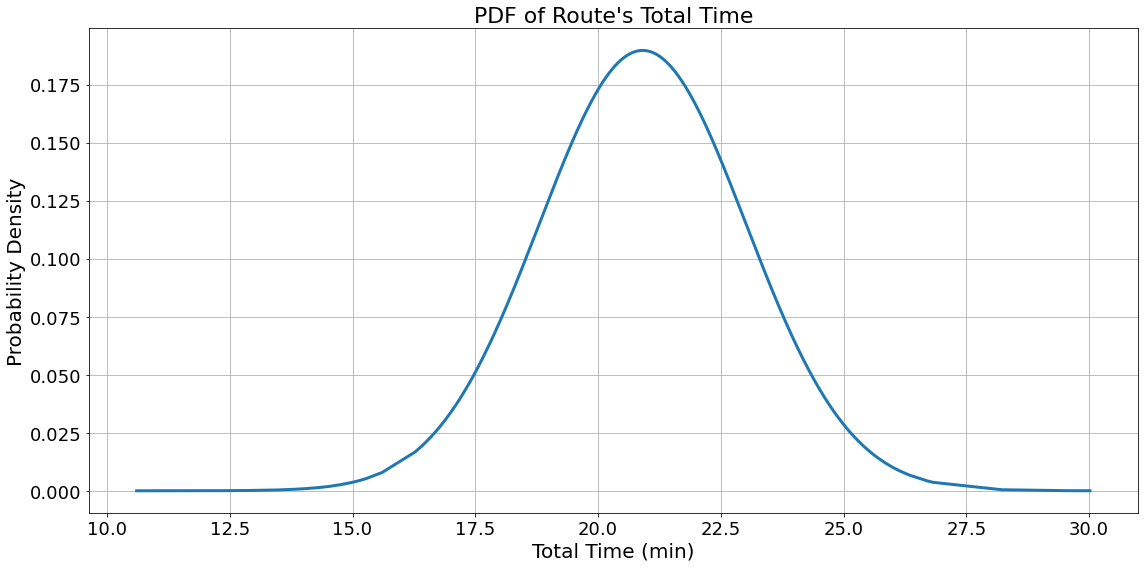

In [82]:
import scipy.stats as stats
sample=df_avg.time_total
pdf = stats.norm.pdf(sample.sort_values(), sample.mean(), sample.std())
#########################################
fig = plt.figure(figsize=(16,8))

plt.plot(sample.sort_values(), pdf,  linewidth = 3)
plt.ylabel('Probability Density', fontsize=20)
plt.xlabel("Total Time (min)", fontsize=20)
# plt.xticks(np.arange(min(sample.sort_values()), max(sample.sort_values())+1, 1.0))

plt.yticks(fontsize=18);
plt.xticks(fontsize=18);
plt.title("PDF of Route's Total Time", fontsize=22)
# plt.xlim(10, 31)
plt.grid()

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/PDF_Time_total_Alldata'+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.tight_layout()
plt.show();

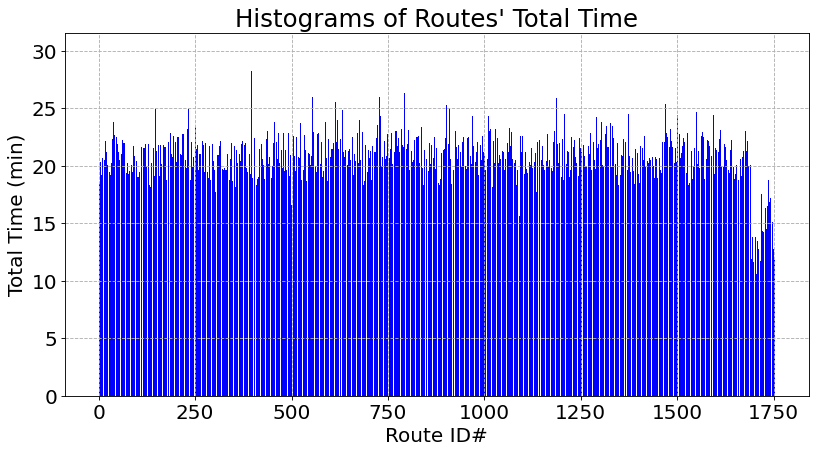

In [83]:
# X_dims=[]
# for i in range(len(X_train)):
#     X_dims.append(len(X_train[i]))
                  
# X_dims
# max(X_dims)

from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
# plt.bar(df_avg.Rt_i, df_avg.time_total, color ='blue',width = 0.4, zorder=3)
plt.bar(df_avg.Rt_i, df_avg.time_total, color ='blue')

plt.xlabel("Route ID#", fontsize=18)
plt.ylabel("Total Time (min)", fontsize=18)
plt.title("Histograms of Routes' Total Time", fontsize=22)
plt.yticks(fontsize=18);
plt.xticks(fontsize=18);
plt.grid(linestyle='--')

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Hists_Time_total_Alldata'+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)


plt.show()

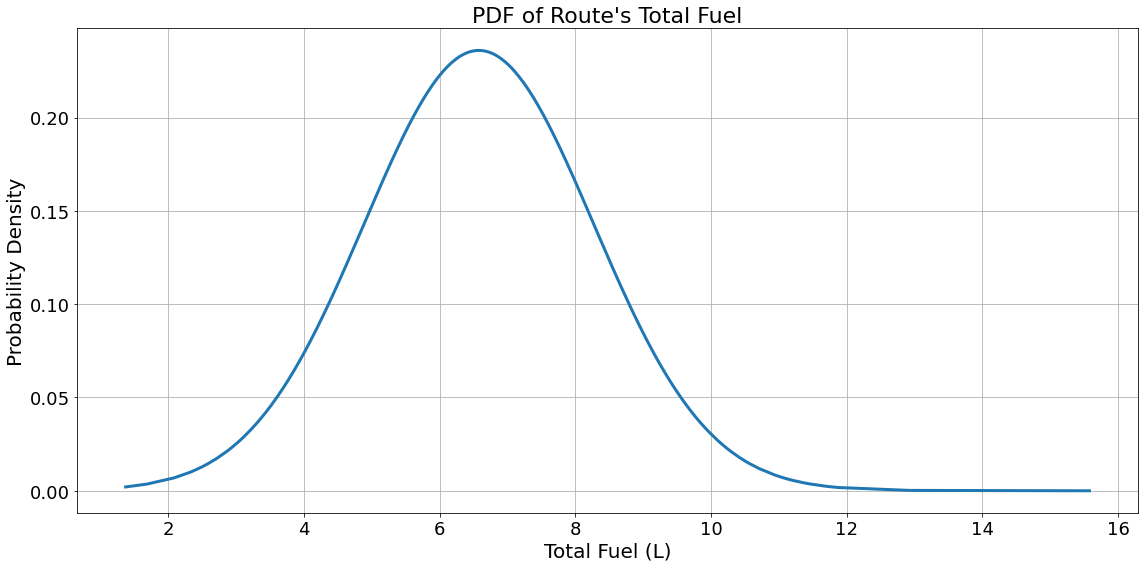

In [84]:
import scipy.stats as stats
sample=df_avg.fuel_total
pdf = stats.norm.pdf(sample.sort_values(), sample.mean(), sample.std())
#########################################
fig = plt.figure(figsize=(16,8))

plt.plot(sample.sort_values(), pdf,  linewidth = 3)
plt.ylabel('Probability Density', fontsize=20)
plt.xlabel("Total Fuel (L)", fontsize=20)
# plt.xticks(np.arange(min(sample.sort_values()), max(sample.sort_values())+1, 1.0))

plt.yticks(fontsize=18);
plt.xticks(fontsize=18);
plt.title("PDF of Route's Total Fuel", fontsize=22)
# plt.xlim(10, 31)
plt.grid()

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/PDF_Fuel_total_Alldata'+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)

plt.tight_layout()
plt.show();

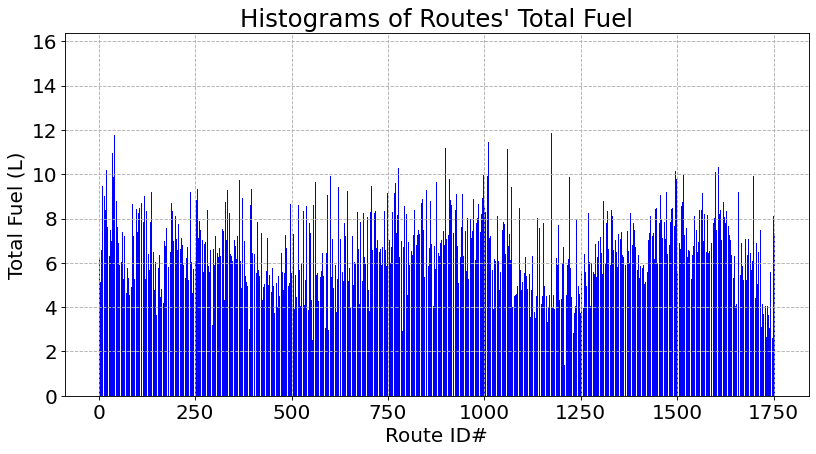

In [85]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
# plt.bar(df_avg.Rt_i, df_avg.time_total, color ='blue',width = 0.4, zorder=3)
plt.bar(df_avg.Rt_i, df_avg.fuel_total, color ='blue')

plt.xlabel("Route ID#", fontsize=18)
plt.ylabel("Total Fuel (L)", fontsize=18)
plt.title("Histograms of Routes' Total Fuel", fontsize=22)
plt.yticks(fontsize=18);
plt.xticks(fontsize=18);
plt.grid(linestyle='--')

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Hists_Fuel_total_Alldata'+'_gr_ock_'+str(gr_ock_fg)+'_NmidS_'+str(nth_mid_sth_fg)+'.png', dpi=500)


plt.show()

In [86]:
from IPython.display import Javascript
from nbconvert import HTMLExporter

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

cwd = os.getcwd() 
# directory = os.path.join('C:/Users/'+user_name+'/iHelm/Sensitivity_Analysis')
directory = os.path.join('C:/Users/'+user_name+'/iHelm/Spatio_Temporl_Agg_Eff_Score')
os.chdir(directory) 
####################
import time
save_notebook()
time.sleep(3)
current_file = 'Preprocess_data_v1.ipynb'
output_file = 'C:/Users/'+user_name+'/'+Output_Subfolder+'/Preprocess_data_v1.html'

# os.chdir('C:/Users/mohabu/OneDrive - Högskolan i Halmstad/Pred_DT_Results')
output_HTML(current_file, output_file)
